# Lesson 1.6

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Lesson 1

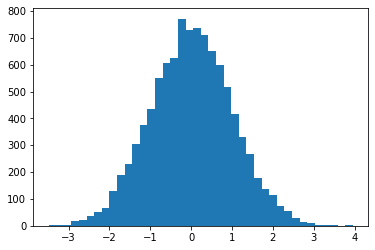

In [2]:
plt.hist(np.random.randn(10000), bins=40)
plt.show()

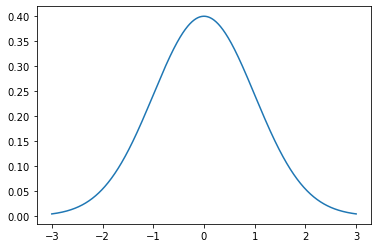

In [3]:
from scipy.stats import norm
import math
normal = norm(0, math.sqrt(9)) 
# print(normal.pdf(4))
# print(normal.cdf(2))       
# print(normal.rvs()) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000)
y = norm.pdf(x)
ax.plot(x,y)
plt.show()

In [4]:
# Lesson 2 Intro to Machine Learning 

# Lesson 2

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# apply linear regression on the following data

In [7]:
data = pd.read_csv('regression_data1.csv')

In [8]:
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
Y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TARGET_D   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     258.2
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        10:32:14   Log-Likelihood:                -18313.
No. Observations:                4843   AIC:                         3.664e+04
Df Residuals:                    4835   BIC:                         3.669e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2092      0.503     12.346      0.0

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
Y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

0.2721089888340975

In [11]:
predictions  = lm.predict(X)

In [12]:
r2_score(Y, predictions)

0.2721089888340975

In [13]:
lm.intercept_

6.20922387315664

In [14]:
lm.coef_

array([ 9.69296995e-05, -2.00305674e-03,  9.84630309e-05, -2.21132354e-03,
        6.71311365e-03,  3.09166582e-05,  6.21136417e-01])

In [15]:
# discuss in more details about the intercept, coefficients, OLS etc in the next section

## Generalized least square model : Additional (not necessary in class)

In [16]:
ols_resid = sm.OLS(Y, X).fit().resid
resid_X = ols_resid[:-1].values
resid_Y = ols_resid[1:].values
res_fit = sm.OLS(resid_Y, resid_X).fit()
rho = res_fit.params

In [17]:
from scipy.linalg import toeplitz
order = toeplitz(np.arange(len(data)))
sigma = rho**order

In [18]:
gls_model = sm.GLS(Y, X, sigma=sigma).fit()
print(gls_model.summary())

                                 GLS Regression Results                                
Dep. Variable:               TARGET_D   R-squared (uncentered):                   0.719
Model:                            GLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              1770.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):                        0.00
Time:                        10:32:58   Log-Likelihood:                         -18386.
No. Observations:                4843   AIC:                                  3.679e+04
Df Residuals:                    4836   BIC:                                  3.683e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Lesson 4 

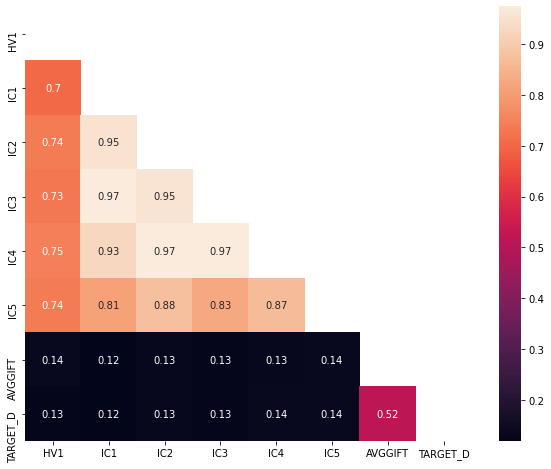

In [19]:
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [20]:
# We can see that there is a very strong positive correlation between IC1 and IC2, IC2 and IC3, IC3 and IC4
# using the concept of multicollinearity, lets drop IC2, IC3 and IC4

In [21]:
data = data.drop(['IC2', 'IC3', 'IC4'],axis=1)

In [22]:
data.columns

Index(['HV1', 'IC1', 'IC5', 'AVGGIFT', 'TARGET_D'], dtype='object')

# Lesson 1.07 begins here

## Lesson 1

In [23]:
# check for normailty assumption and skewness using histograms and distribution plots 
# for the remaining variables

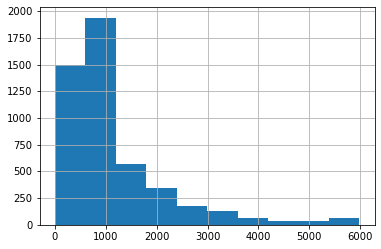

In [24]:
data['HV1'].hist()
plt.show()

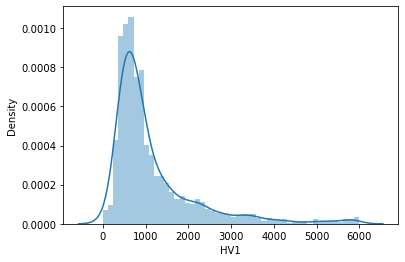

In [25]:
sns.distplot(data['HV1'])
plt.show()

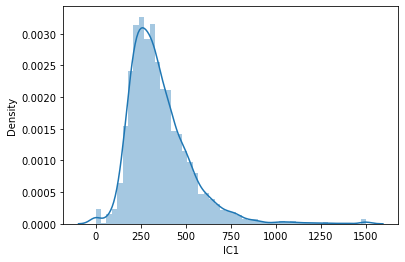

In [26]:
sns.distplot(data['IC1'])
plt.show()

<AxesSubplot:xlabel='IC1'>

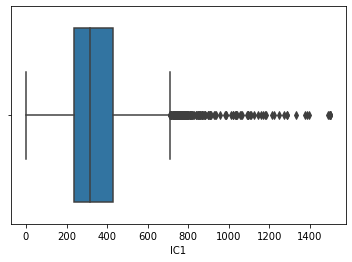

In [27]:
sns.boxplot(x=data['IC1'])

In [28]:
data.describe()['IC1']

count    4843.000000
mean      352.831922
std       171.357547
min         0.000000
25%       239.000000
50%       318.000000
75%       427.000000
max      1500.000000
Name: IC1, dtype: float64

In [29]:
iqr = np.percentile(data['IC1'],75) - np.percentile(data['IC1'],25)
upper_limit = np.percentile(data['IC1'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC1'],25) - 1.5*iqr

In [30]:
data = data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)]

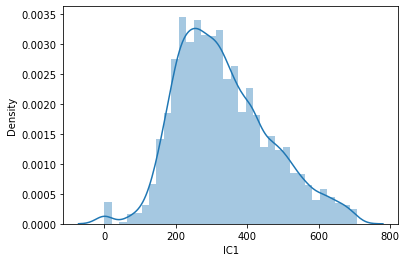

In [31]:
sns.distplot(data['IC1'])
plt.show()

# Lesson 2

In [32]:
# Transformations

In [33]:
# Log transformation

In [34]:
# Since some values might become -inf, we will have to filter those values. Remember we might not able 
# to use this method if there's too many such values, and if they are important

In [35]:
# Code to test how the transformation will look like 

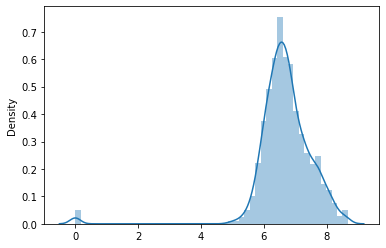

In [36]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 
HV1_log = list(map(log_transfom_clean, data['HV1']))
sns.distplot(HV1_log)
plt.show()

In [37]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later   
data['HV1_log'] = list(map(log_transfom_clean_, data['HV1']))

In [38]:
data['HV1_log'] = data['HV1_log'].fillna(np.mean(data['HV1_log']))

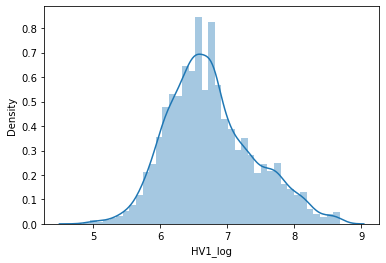

In [39]:
sns.distplot(data['HV1_log'])
plt.show()

In [40]:
data = data.drop(['HV1'], axis=1)
data.head()

,IC1,IC5,AVGGIFT,TARGET_D,HV1_log
0,420,14552,15.500000,21.0,7.760467
1,350,11696,3.080000,3.0,6.208590
2,469,17313,7.500000,20.0,7.113956
3,148,6334,6.700000,5.0,5.783825
4,174,7802,8.785714,10.0,6.643790


# Lesson 3

In [41]:
# Box cox transformation

In [42]:
# for using it in scipy, the data should be strictly positive. We will use it on 'IC1'. 
# since this is median house hold income , we can filter out negative values 

In [43]:
# len(data[data['IC1']<=0])  # number of such observations. 
# if you do not want to lose this data, replace it with the mean of the column

In [44]:
data['IC1_'] = np.where(data['IC1']<=0,0,data['IC1'])
# now calculate mean of the new column , exluding zeros in the count 
mean = np.sum(data['IC1_'])/len(data[data['IC1_']>0])
data['IC1_'] = data['IC1_'].replace(0,mean)

In [45]:
data = data.drop(['IC1'], axis=1)

In [46]:
from scipy import stats
xt, lmbda = stats.boxcox(data['IC1_'])

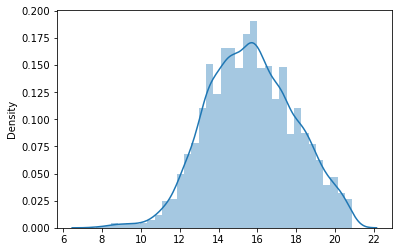

In [47]:
sns.distplot(xt)
plt.show()

In [48]:
# Repeat the same steps for column 'IC5'

In [49]:
# for box cox transformation, we can also use sklearn's preprocessing module. It will be introduced later

In [50]:
data.head()

,IC5,AVGGIFT,TARGET_D,HV1_log,IC1_
0,14552,15.500000,21.0,7.760467,420.0
1,11696,3.080000,3.0,6.208590,350.0
2,17313,7.500000,20.0,7.113956,469.0
3,6334,6.700000,5.0,5.783825,148.0
4,7802,8.785714,10.0,6.643790,174.0


In [51]:
data['IC5_'] = np.where(data['IC5']<=0,0,data['IC5'])
mean = np.sum(data['IC5_'])/len(data[data['IC5_']>0])
data['IC5_'] = data['IC5_'].replace(0,mean)
data = data.drop(['IC5'], axis=1)
xt2, lmbda2 = stats.boxcox(data['IC5_'])

In [52]:
data['IC1_transformed'] = xt
data['IC5_transformed'] = xt2
data = data.drop(['IC1_', 'IC5_'], axis=1)
data.head()

,AVGGIFT,TARGET_D,HV1_log,IC1_transformed,IC5_transformed
0,15.500000,21.0,7.760467,17.343389,4.181353
1,3.080000,3.0,6.208590,16.230984,4.150313
2,7.500000,20.0,7.113956,18.047227,4.205057
3,6.700000,5.0,5.783825,11.737110,4.055333
4,8.785714,10.0,6.643790,12.494862,4.088969


In [53]:
Y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)

# Lesson 4

In [54]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [55]:
data = pd.read_csv('/Users/marcus/Documents/Projects/Ironhack/data_1.07_activities/files_for_activities/csv_files/regression_data1.csv')
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [56]:
Y = data['TARGET_D']
data = data.drop(['TARGET_D'], axis=1)

In [57]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

In [58]:
# Standardizing data 

In [59]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X_num)

x_normalized = transformer.transform(X_num)

print(x_normalized.shape)
# pd.DataFrame(x_normalized)

(4843, 7)


In [60]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_num)

x_standardized = transformer.transform(X_num)

print(x_standardized.shape)
# pd.DataFrame(x_standardized)

(4843, 7)


In [61]:
X_num.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,2346,420,446,468,503,14552,15.500000
1,497,350,364,357,384,11696,3.080000
2,1229,469,502,507,544,17313,7.500000
3,325,148,181,171,209,6334,6.700000
4,768,174,201,220,249,7802,8.785714


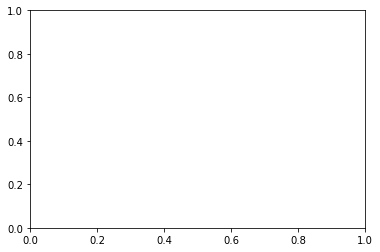

In [62]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [63]:
mean, var, skew, kurt = uniform.stats(moments='mvsk')

In [64]:
x = np.linspace(uniform.ppf(0.01),
                uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x),
       'r-', lw=5, alpha=0.6, label='uniform pdf')